# Exploratory Data Analysis OF BLINKIT DATASET

- In this analysis, I explored different factors that affect product sales and customer behavior.
- EDA, I cleaned the dataset, handled missing values, removed duplicates, and standardized categories.
- analyzed each feature to understand trends in item types, outlet types, ratings, visibility, and sales.
- I performed univariate, bivariate, and multivariate analysis

# Importing Required Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# **Understanding the Data**

# Loading the Dataset

In [ ]:


df = pd.read_csv('/content/BlinkIT-Grocery-Data.csv')
df.head()


,Item Fat Content,Item Identifier,Item Type,Outlet Establishment Year,Outlet Identifier,Outlet Location Type,Outlet Size,Outlet Type,Item Visibility,Item Weight,Sales,Rating
0,Regular,FDX32,Fruits and Vegetables,2012,OUT049,Tier 1,Medium,Supermarket Type1,0.100014,15.10,145.4786,5.0
1,Low Fat,NCB42,Health and Hygiene,2022,OUT018,Tier 3,Medium,Supermarket Type2,0.008596,11.80,115.3492,5.0
2,Regular,FDR28,Frozen Foods,2016,OUT046,Tier 1,Small,Supermarket Type1,0.025896,13.85,165.0210,5.0
3,Regular,FDL50,Canned,2014,OUT013,Tier 3,High,Supermarket Type1,0.042278,12.15,126.5046,5.0
4,Low Fat,DRI25,Soft Drinks,2015,OUT045,Tier 2,Small,Supermarket Type1,0.033970,19.60,55.1614,5.0


# Dataset Size

In [ ]:
df.shape


(8523, 12)

# Dataset Information

In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item Fat Content           8523 non-null   object 
 1   Item Identifier            8523 non-null   object 
 2   Item Type                  8523 non-null   object 
 3   Outlet Establishment Year  8523 non-null   int64  
 4   Outlet Identifier          8523 non-null   object 
 5   Outlet Location Type       8523 non-null   object 
 6   Outlet Size                8523 non-null   object 
 7   Outlet Type                8523 non-null   object 
 8   Item Visibility            8523 non-null   float64
 9   Item Weight                7060 non-null   float64
 10  Sales                      8523 non-null   float64
 11  Rating                     8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


### summary of numerical columns

In [ ]:
df.describe()


,Outlet Establishment Year,Item Visibility,Item Weight,Sales,Rating
count,8523.000000,8523.000000,7060.000000,8523.000000,8523.000000
mean,2016.450546,0.066132,12.857645,140.992783,3.965857
std,3.189396,0.051598,4.643456,62.275067,0.605651
min,2011.000000,0.000000,4.555000,31.290000,1.000000
25%,2014.000000,0.026989,8.773750,93.826500,4.000000
50%,2016.000000,0.053931,12.600000,143.012800,4.000000
75%,2018.000000,0.094585,16.850000,185.643700,4.200000
max,2022.000000,0.328391,21.350000,266.888400,5.000000


## DataType


In [ ]:
df.dtypes


,0
Item Fat Content,object
Item Identifier,object
Item Type,object
Outlet Establishment Year,int64
Outlet Identifier,object
Outlet Location Type,object
Outlet Size,object
Outlet Type,object
Item Visibility,float64
Item Weight,float64


# Understanding Categorical Columns

In [ ]:
print(df['Item Fat Content'].value_counts())
print('-----------------------------------')
print(df['Outlet Size'].value_counts())
print('-----------------------------------')
print(df['Outlet Location Type'].value_counts())
print('-----------------------------------')
print(df['Outlet Type'].value_counts())
print('-----------------------------------')

Item Fat Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: count, dtype: int64
-----------------------------------
Outlet Size
Medium    3631
Small     3139
High      1753
Name: count, dtype: int64
-----------------------------------
Outlet Location Type
Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: count, dtype: int64
-----------------------------------
Outlet Type
Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: count, dtype: int64
-----------------------------------


# **Data Cleaning**

# Checking missing values

In [ ]:

df.isnull().sum()


,0
Item Fat Content,0
Item Identifier,0
Item Type,0
Outlet Establishment Year,0
Outlet Identifier,0
Outlet Location Type,0
Outlet Size,0
Outlet Type,0
Item Visibility,0
Item Weight,1463


## Filling missing Item Weight with mean

In [ ]:

df['Item Weight'] = df['Item Weight'].fillna(df['Item Weight'].mean())


In [ ]:
df.isnull().sum()

,0
Item Fat Content,0
Item Identifier,0
Item Type,0
Outlet Establishment Year,0
Outlet Identifier,0
Outlet Location Type,0
Outlet Size,0
Outlet Type,0
Item Visibility,0
Item Weight,0


##Checking and Removing Duplicate Rows

In [ ]:
df.duplicated().sum()


np.int64(0)

In [ ]:
df = df.drop_duplicates()


In [ ]:
df['Item Fat Content'] = df['Item Fat Content'].replace({
    'LF':'Low Fat',
    'low fat':'Low Fat',
    'reg':'Regular'
})

df['Item Fat Content'].value_counts()

,count
Item Fat Content,
Low Fat,5517
Regular,3006


# Correlation Analysis (Numeric Columns Only)

In [ ]:
df.corr(numeric_only=True)


,Outlet Establishment Year,Item Visibility,Item Weight,Sales,Rating
Outlet Establishment Year,1.000000,-0.058087,-0.004475,-0.000654,0.000414
Item Visibility,-0.058087,1.000000,-0.012048,-0.001315,0.000798
Item Weight,-0.004475,-0.012048,1.000000,0.024756,0.002487
Sales,-0.000654,-0.001315,0.024756,1.000000,0.011329
Rating,0.000414,0.000798,0.002487,0.011329,1.000000


# **Univariate Analysis**

# Outlet Type Distribution (Bar Chart)
 - Supermarket Type1 has the highest count (5577 outlets).
  - Grocery Store, Supermarket Type2 & Type3 have much fewer outlets.
- This helps understand how the dataset is distributed across outlet types.

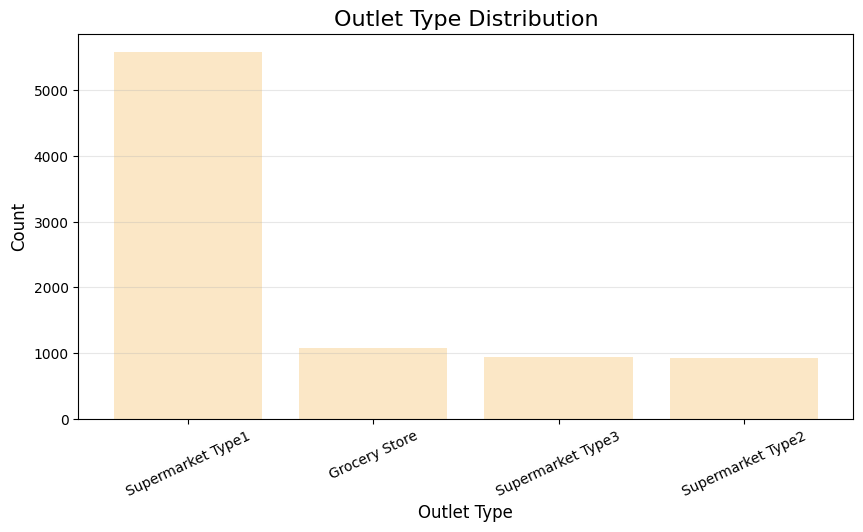

In [ ]:
plt.figure(figsize=(10,5))
counts = df["Outlet Type"].value_counts()
bars = plt.bar(counts.index, counts.values, color="#FBE7C6")
plt.title("Outlet Type Distribution", fontsize=16)
plt.xlabel("Outlet Type", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.grid(axis='y', alpha=0.3)
plt.xticks(rotation=25)


plt.show()

# Outlet Size Distribution (Pie Chart)
- BlinkIT’s outlet distribution strategy they prefer medium sized outlets.
- Shows how BlinkIT distributes its outlet sizes.

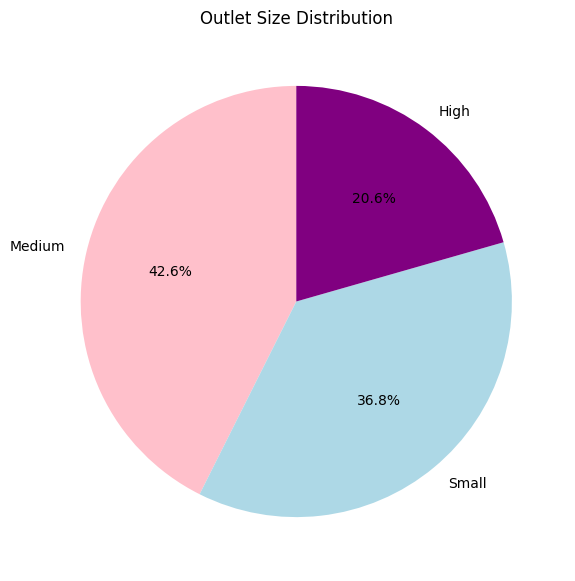

In [ ]:
sizes = df['Outlet Size'].value_counts()
colors = ['pink', 'lightblue', 'purple']
plt.figure(figsize=(7,7))
plt.pie(sizes,
        labels=sizes.index,
        autopct='%1.1f%%',
        startangle=90,
        colors=colors)

plt.title("Outlet Size Distribution")
plt.show()


# Outlet Location Type Distribution (Bar Chart)
BlinkIT has more stores in suburban or developing areas compared to metro cities
 - Tier 3 has the highest number of outlets.
  - Tier 2 is in the middle.
  - Tier 1 has the least outlets.

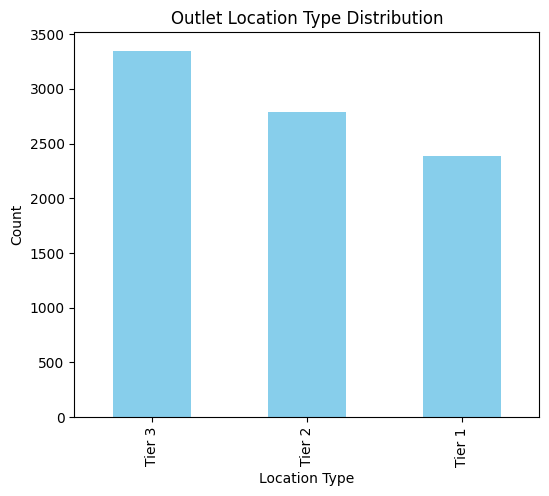

In [ ]:
plt.figure(figsize=(6,5))
df['Outlet Location Type'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Outlet Location Type Distribution')
plt.xlabel('Location Type')
plt.ylabel('Count')
plt.show()


# Most Common Item Types (Horizontal Bar Chart)
- Fruits & Vegetables are the most common items.
- Snack Foods, Household, and Frozen Foods follow next.
- Categories like Seafood and Breakfast have the lowest counts.
- This helps understand BlinkIT's most stocked categories and least ones

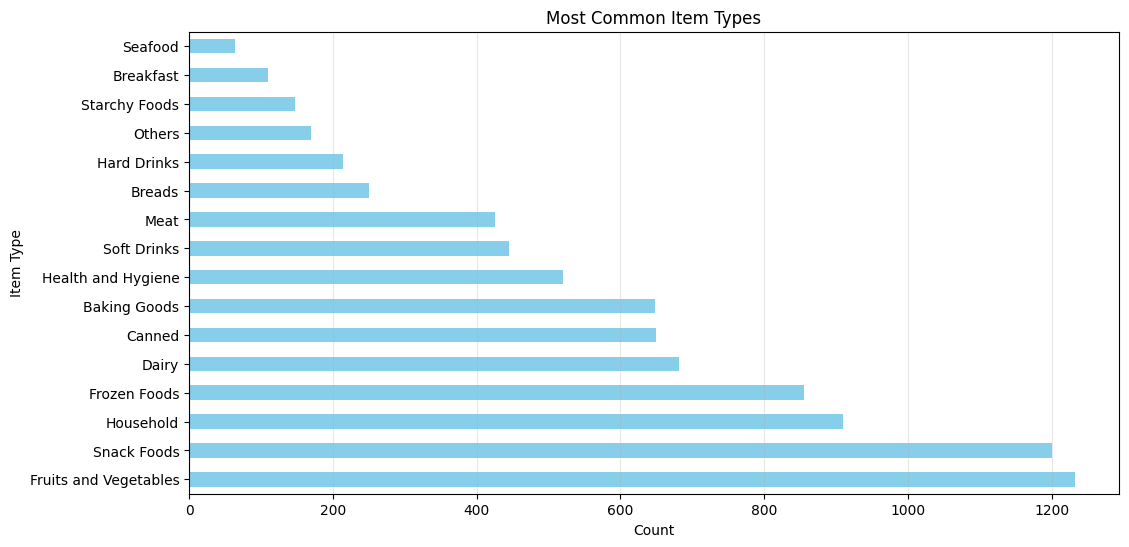

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,6))
df['Item Type'].value_counts().plot(kind='barh', color='skyblue')
plt.title('Most Common Item Types')
plt.xlabel('Count')
plt.ylabel('Item Type')
plt.grid(axis='x', alpha=0.3)

plt.show()


# Boxplot of Sales
- The boxplot visualizes the distribution of the Sales column.
- Median sales ≈ 140.
- Middle 50% of sales range between Q1 and Q3 (IQR).
- Whiskers show sales roughly between 30 and 270.
- No major outliers detected.
- Useful for understanding spread, center, and variability.


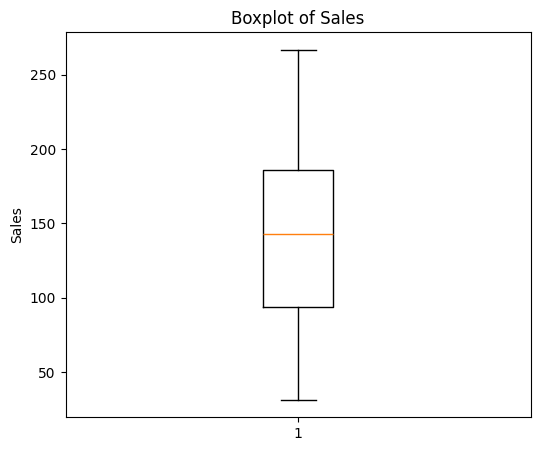

In [ ]:
plt.figure(figsize=(6,5))
plt.boxplot(df['Sales'])
plt.title('Boxplot of Sales')
plt.ylabel('Sales')
plt.show()


# Distribution of Ratings (Histogram)
- Most ratings lie between 3.5 and 4.5.
- Peak at rating 4.0 → most common rating.
- Very few low ratings → product quality is generally good.
-Histogram helps identify overall rating pattern.

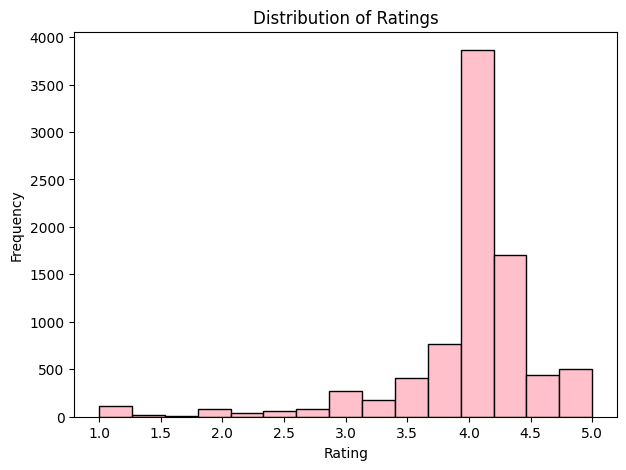

In [ ]:
plt.figure(figsize=(7,5))
plt.hist(df['Rating'],color='pink', bins=15, edgecolor='black')
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()


# BIVARIATE ANALYSIS

# Scatter Plot — Sales vs Item Weight (Colored by Item Visibility)
- No strong relationship between weight and sales.
- Higher visibility items show slightly better sales.
- Most products have low visibility (blue points dominate).

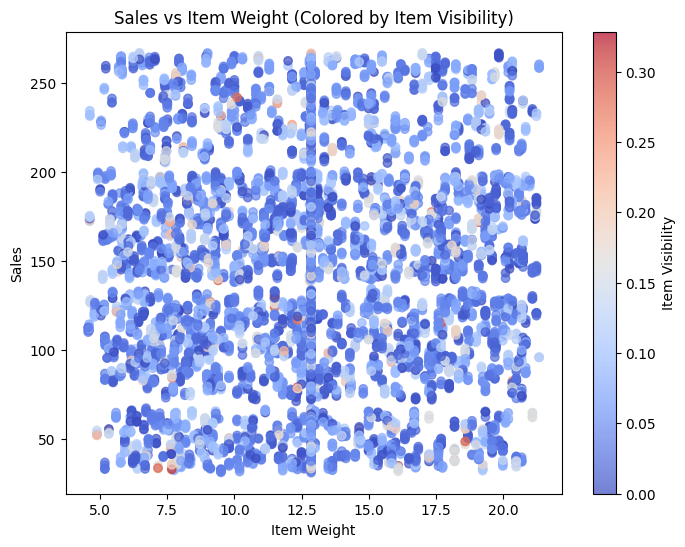

In [ ]:
plt.figure(figsize=(8,6))
scatter = plt.scatter(
    df['Item Weight'],
    df['Sales'],
    c=df['Item Visibility'],
    cmap='coolwarm',
    alpha=0.7)
plt.colorbar(scatter, label='Item Visibility')
plt.title('Sales vs Item Weight (Colored by Item Visibility)')
plt.xlabel('Item Weight')
plt.ylabel('Sales')
plt.show()


# Item Visibility vs Rating (Scatter Plot)
- No strong relationship between visibility and rating.
- Ratings remain mostly between 3.5 and 5 across all visibility levels.
- Most items have low visibility (0.0–0.1).
- Visibility does not affect customer ratings.

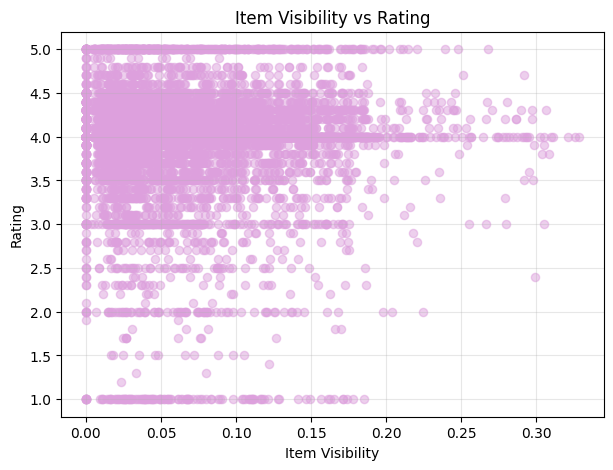

In [ ]:
plt.figure(figsize=(7,5))
plt.scatter(df['Item Visibility'], df['Rating'],
            color='plum', alpha=0.5, s=35)
plt.title('Item Visibility vs Rating')
plt.xlabel('Item Visibility')
plt.ylabel('Rating')
plt.grid(alpha=0.3)
plt.show()


# Average Sales by Outlet Establishment Year (Line Chart)
- Sales are very stable across all years (139–143 range).
  - 2017 shows the highest average sales.
  - 2020 shows the lowest.
  - Establishment year does not strongly impact sales.

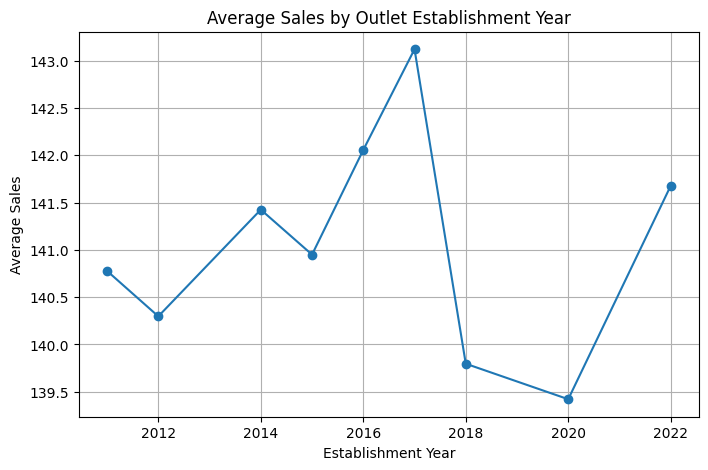

In [ ]:
year_sales = df.groupby('Outlet Establishment Year')['Sales'].mean()

plt.figure(figsize=(8,5))
plt.plot(year_sales.index, year_sales.values, marker='o')
plt.title('Average Sales by Outlet Establishment Year')
plt.xlabel('Establishment Year')
plt.ylabel('Average Sales')
plt.grid(True)
plt.show()


# Average Sales by Item Type (Sorted)

- Grouped data by item type and calculated average sales.
- Sorted values from highest to lowest for easier comparison.
- Household, Dairy, Starchy Foods, and Snack Foods have the highest average sales.
- Baking Goods and Health & Hygiene have the lowest average sales.
- Most categories have similar sales values (130–150 range), showing balanced performance.


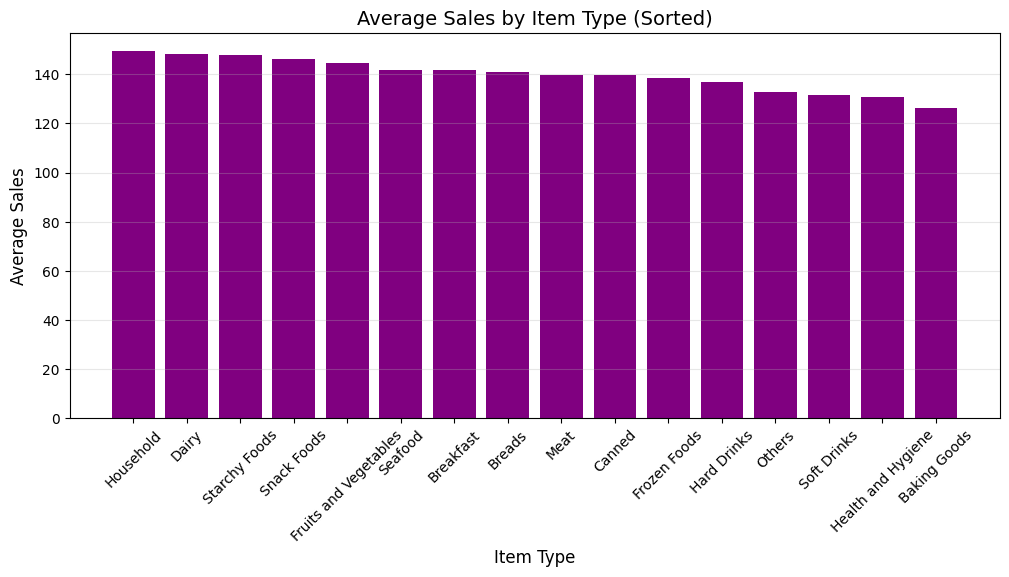

In [ ]:

sales = df.groupby("Item Type")["Sales"].mean().sort_values(ascending=False)

plt.figure(figsize=(12,5))
plt.bar(sales.index, sales.values, color='purple')

plt.title("Average Sales by Item Type (Sorted)", fontsize=14)
plt.xlabel("Item Type", fontsize=12)
plt.ylabel("Average Sales", fontsize=12)
plt.xticks(rotation=45)

plt.grid(axis='y', alpha=0.3)

plt.show()


# **MULTIVARIATE ANALYSIS**

# Sales Trend Over Years by Outlet Type
- Shows how average sales vary by outlet type across different establishment years.
- Supermarket Type1 shows a clear increasing trend in sales.
- Other outlet types appear only for specific years, so trends are weaker.
- Helps understand outlet performance over time.

<Figure size 1000x600 with 0 Axes>

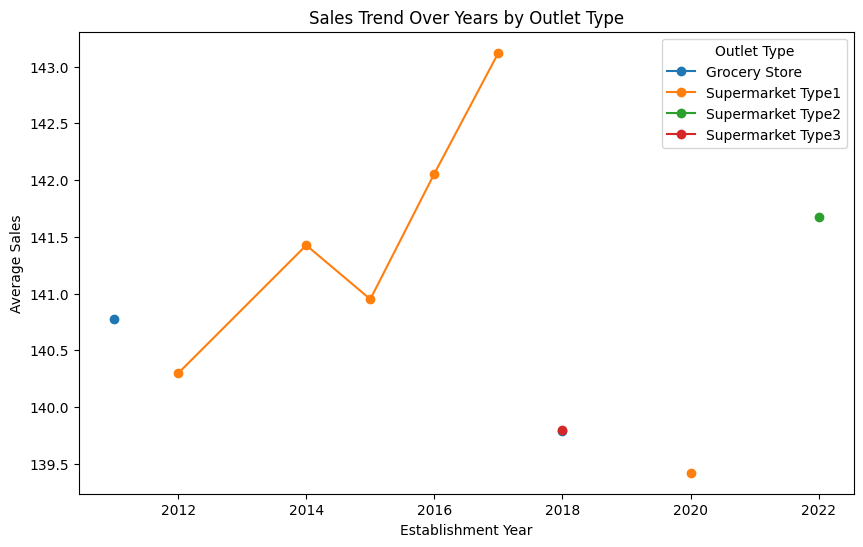

In [ ]:
plt.figure(figsize=(10,6))

outlet_groups = df.groupby(['Outlet Establishment Year', 'Outlet Type'])['Sales'].mean().unstack()

outlet_groups.plot(marker='o', figsize=(10,6))
plt.title("Sales Trend Over Years by Outlet Type")
plt.xlabel("Establishment Year")
plt.ylabel("Average Sales")
plt.show()


# 3D Scatter Plot: Item Weight vs Item Visibility vs Sales
- X-axis: Item Weight
- Y-axis: Item Visibility
- Z-axis: Sales
- Points are scattered → no strong relationship between weight, visibility, and sales.
- Low visibility items can still achieve high sales.
- Sales depend on other factors, not just weight or visibility.


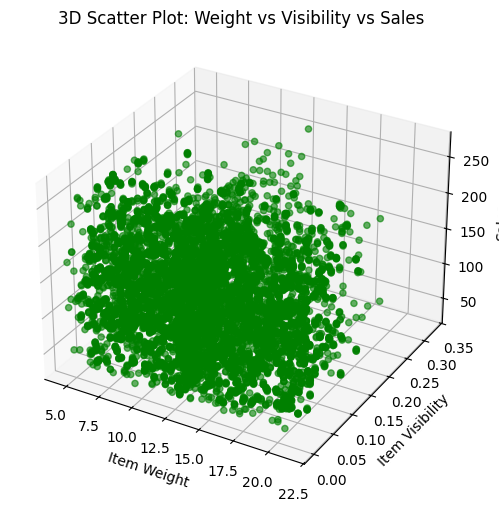

In [ ]:

fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['Item Weight'],
           df['Item Visibility'],
           df['Sales'],
           c='green',
           s=20,
           alpha=0.6)
ax.set_title('3D Scatter Plot: Weight vs Visibility vs Sales')
ax.set_xlabel('Item Weight')
ax.set_ylabel('Item Visibility')
ax.set_zlabel('Sales')

plt.show()


# What Affects Sales Outcome?

- Item Visibility → Weak impact
- Item Weight → No impact
- Item Type → Significant impact on sales
- Outlet Type → Strong influence (Supermarket Type1 highest)
- Establishment Year → Weak trend
- Rating → Very weak correlation

**Main Drivers of Sales: Item Type & Outlet Type**


**Sales in BlinkIT are influenced mostly by the product’s category and the type of outlet where it is sold.
Item weight, visibility, store age, and rating have very weak or no direct impact on sales.
This means BlinkIT sales depend more on shopper preferences and store type than on item characteristics.**